In [616]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [617]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

In [618]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
#mixtag='angle_cut_15deg_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [619]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [620]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


CPU times: user 5.77 s, sys: 1.11 s, total: 6.88 s
Wall time: 7.01 s


In [621]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    for suffix in "", "_tweak", "_tweak2","_tweak_harut":
        #GiBUU
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix),target)
print (dfs_trigger.keys())

D
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [622]:
for dct in dfs_mixed,dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [623]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
10< h1_th 129258  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129258  (100.00  %)
Nom cuts for the trigger applied 44785  (34.65  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44785  (100.00  %)
2.2 < nu < 4.2 44785  (100.00  %)
secondary hadrons are pions 44785  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 35717  (79.75  %)
kinematic limits for h2_z 35636  (99.77  %)
kinematic limits for dphi 35596  (99.89  %)
kinematic limits for pair_mass 35415  (99.49  %)
leading hadrons are pions 35415  (100.00  %)
0.2<h2_p<5.0 35415  (100.00  %)
0.2<h1_p<5.0 35415  (100.00  %)
10<h2_th 35415  (100.00  %)
Theta/P fiducial region selected for secondary hadron 32420  (91.54  %)
10< h1_th 32420  (100.00  %)
Theta/P fiducial region

2.2 < nu <4.2 2306882  (95.91  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2306882  (100.00  %)
2.2 < nu < 4.2 2306882  (100.00  %)
secondary hadrons are pions 1392583  (60.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 1331857  (95.64  %)
kinematic limits for h2_z 1280597  (96.15  %)
kinematic limits for dphi 1279264  (99.90  %)
kinematic limits for pair_mass 1275717  (99.72  %)
leading hadrons are pions 1275717  (100.00  %)
0.2<h2_p<5.0 1164507  (91.28  %)
0.2<h1_p<5.0 1164507  (100.00  %)

key:  GiBUU_D_tweak_harut
Entries before cut  2348393
Q2>1.0 and Q2<4.0 2347490  (99.96  %)
0.2<h1_p<5.0  2347490  (100.00  %)
inelasticity < 0.85 2347490  (100.00  %)
h1_pid = pions (trigger) 2347490  (100.00  %)
2.2 < nu <4.2 2254015  (96.02  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2254015  (100.00  %)
2.2 < nu < 4.2 2254015  (100.00  %)
secondary hadrons are pions 1328454  (58.94  %)
(h1_pid*h2_pid)<0, opposite charge pions 1282421  (96.53  %)
kine

0.2<h1_p<5.0  511802  (100.00  %)
inelasticity < 0.85 511802  (100.00  %)
h1_pid = pions (trigger) 511802  (100.00  %)
2.2 < nu <4.2 490225  (95.78  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 490225  (100.00  %)
2.2 < nu < 4.2 490225  (100.00  %)
secondary hadrons are pions 275663  (56.23  %)
(h1_pid*h2_pid)<0, opposite charge pions 246891  (89.56  %)
kinematic limits for h2_z 230266  (93.27  %)
kinematic limits for dphi 230079  (99.92  %)
kinematic limits for pair_mass 229055  (99.55  %)
leading hadrons are pions 229055  (100.00  %)
0.2<h2_p<5.0 192716  (84.14  %)
0.2<h1_p<5.0 192716  (100.00  %)

key:  GiBUU_Pb_tweak_harut
Entries before cut  1204097
Q2>1.0 and Q2<4.0 1203510  (99.95  %)
0.2<h1_p<5.0  1203510  (100.00  %)
inelasticity < 0.85 1203510  (100.00  %)
h1_pid = pions (trigger) 1203510  (100.00  %)
2.2 < nu <4.2 1153189  (95.82  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 1153189  (100.00  %)
2.2 < nu < 4.2 1153189  (100.00  %)
seco

In [624]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  652690
Q2>1.0 and Q2<4.0 652690  (100.00  %)
0.2<h1_p<5.0  652674  (100.00  %)
inelasticity < 0.85 652674  (100.00  %)
h1_pid = pions (trigger) 652674  (100.00  %)
2.2 < nu <4.2 642836  (98.49  %)
10< h1_th 642836  (100.00  %)
Theta/P fiducial region selected for trigger hadron 642836  (100.00  %)
Nom cuts for the trigger applied 291788  (45.39  %)
 
D_C False
Entries before cut  875478
Q2>1.0 and Q2<4.0 875478  (100.00  %)
0.2<h1_p<5.0  875467  (100.00  %)
inelasticity < 0.85 875467  (100.00  %)
h1_pid = pions (trigger) 875467  (100.00  %)
2.2 < nu <4.2 863117  (98.59  %)
10< h1_th 863117  (100.00  %)
Theta/P fiducial region selected for trigger hadron 863117  (100.00  %)
Nom cuts for the trigger applied 405810  (47.02  %)
 
Fe False
Entries before cut  370123
Q2>1.0 and Q2<4.0 370122  (100.00  %)
0.2<h1_p<5.0  370122  (100.00  %)
inelasticity < 0.85 370122  (100.00  %)
h1_pid = pions (trigger) 370122  (100.00  %)
2.2 < nu <4.2 370122  (100.00  %)
10< h1_th

In [625]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mixed.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    dfs_mixed[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_mixed[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    
    print(f"\n\n{key}")
    if  'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
    dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
    dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)

    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
    dfs_mixed[key] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 3403326  (100.00  %)
2.2 < nu < 4.2 3361656  (98.78  %)
secondary hadrons are pions 2449421  (72.86  %)
(h1_pid*h2_pid)<0, opposite charge pions 930584  (37.99  %)
kinematic limits for h2_z 899056  (96.61  %)
kinematic limits for dphi 898616  (99.95  %)
kinematic limits for pair_mass 890515  (99.10  %)
leading hadrons are pions 890515  (100.00  %)
0.2<h2_p<5.0 890515  (100.00  %)
0.2<h1_p<5.0 890515  (100.00  %)
pt>0.07071067811865475 GeV 866977  (97.36  %)
10<h2_th 866977  (100.00  %)
Theta/P fiducial region selected for secondary hadron 816153  (94.14  %)
10< h1_th 816153  (100.00  %)
Theta/P fiducial region selected for trigger hadron 816153  (100.00  %)
Nom cuts for the pair applied (pi pi) 339912  (41.65  %)


C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2509591  (100.00  %)
2.2 < nu < 4.2 2476511  (98.68  %)
secondary hadrons are pions 1581622  (63.86  %)
(h1_pid*h2_pid)<0, opposite charge 

In [626]:
#dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
#dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

# Cuts used in PRL

In [627]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  =' and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

In [628]:
for df in list(dfs_pair.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
    theta_qe=f"{theta_q}+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [629]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")



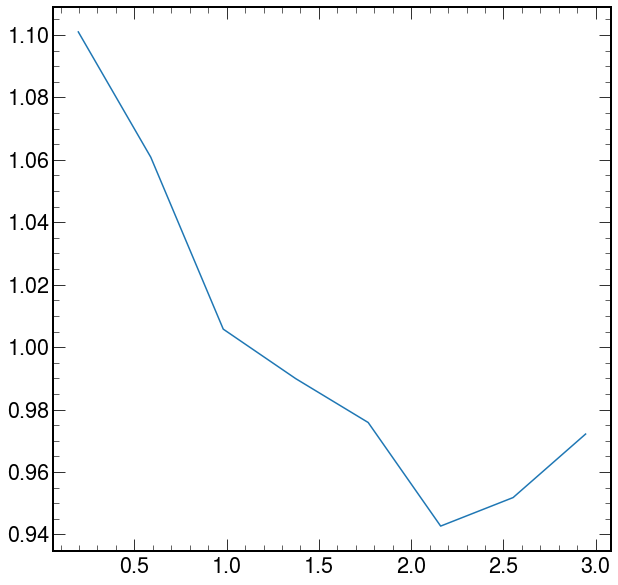

In [630]:
def mix_corr_alt(df):
    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    #ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    
    ym=[sum(ym[i*subbins:(i+1)*subbins])+sum(ym[ntotbins-(i+1)*subbins:ntotbins-i*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]
pid=211; pT1min=.25; pT2min=.25; pMin=0.35
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
plt.plot(np.linspace(np.pi/16, 15*np.pi/16, 8), mix_corr_alt(dfs_pair["D"].query(q)))

In [632]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=True, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8, nbins_GiBUU=16, GiBUU_suffix="",
              addCuts=None, addCutsTrig=None, divideByMix=False, sliceNh=False):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    GiBUU=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        GiBUU.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        if usePRLcuts: #use separate calculation for D data gained with each
                       #nuclear target, just like in the PRL
            Alist= zip((0, -1, 1,-1,2, -1,3), "D D_C C D_Fe Fe D_Pb Pb".split())
        else:
            Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
            #if usePRLcuts:
            #    q = "h2_z>0.05 and h1_z>0.5"
            #N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

            #M_alt = mix_corr_alt(dfs_mixed[A].query(q))
            
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom
            
            if sliceNh:
                qtrig+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            #M = N2mix/(sum(N2mix)/len(N2mix))
            #dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))

            #M_err = np.sqrt(np.mean((M-1)**2))/2
            #print((A,pid,k),"estimated syst error from event mixing",  M_err)
            #if divideByMix:
            #    C = S/M
            #    dCstat = dSstat/M
            #else :
            C=S
            dCstat = dSstat
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = C*systPct/100
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, dSstat=dSstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, dRsyst=R_data*0.0,
                                        N2h=N2, N1=[N1]*len(N2)))
            if "D_" in A:
                continue

            #GiBUU
            # do the GiBUU twice: once with the same number of bins as the data,
            # and then with a finer binning
        
        for useFinerBinning in False, True:
            integral_GiBUU_D = 0
            GiBUU_D=None
            for i, A in enumerate("D C Fe Pb".split()):
            
                nbins = nbins_data if not useFinerBinning else nbins_GiBUU
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                q = f"h1_pid=={pid} and h1_z>0.5  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                if pThetaCutsGiBUU:
                    q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"


                N2, x = np.histogram(dfs_pair[f"GiBUU_{A}"+GiBUU_suffix].query(q)['dphi'], bins=bins)

                x = (x[1:]+x[:-1])/2
                dx =x[1]-x[0]

                qtrig = f"h1_pid=={pid}  and h1_z>0.5 "
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                if pThetaCutsGiBUU:
                    qtrig += " and " + pThetaCuts_trig + f" and  h1_cm_pt > {pT1min}"
                N1 = len(dfs_trigger["GiBUU_"+A+GiBUU_suffix].query(qtrig))
                y = N2/N1/dx/2
                dy=y*np.sqrt(1/N2+1/N1)
                
                #print(N1, N2)
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2

                y/=integral_GiBUU_D
                dy/=integral_GiBUU_D
                if A=="D" or "D_" in A:
                    GiBUU_D = pd.Series(y)
                R_GiBUU = y/GiBUU_D

                tmp = A + "_fine" if useFinerBinning else A
                GiBUU[k][tmp] = pd.DataFrame(dict(C=y,dCstat=dy, R=y/GiBUU_D,
                                                phi=x, 
                                                 phi_low=bins[:-1], phi_up=bins[1:]))
            
            

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
            
        else :
            sliceinfo[k] = f""
                
    return data, GiBUU, sliceinfo

In [780]:
from scipy.interpolate import make_interp_spline
def make_plots_new(data, GiBUU, sliceinfo, pMin=.350, pT1min=.25, pT2min=.25, filename_tag=None,
                  slice_unit=None, useSpline=False, gibuuStats=True):
    

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"Correlation",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$A/D$ Ratio       "
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "CR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        #figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
        #       figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))   
        for key in keys:
            axs[key] = [axs[key]]
    else:
        #figs["SM"], ax = plt.subplots(len(sliceinfo), 2, 
        #       figsize=(width,height),sharey='col', sharex='all')
        #axs["S"] = [ax[k][0] for k in range(len(ax))]
        #axs["M"] = [ax[k][1] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.25), sharex='all', sharey='none',
                                     gridspec_kw=dict(height_ratios=[10,2.5]))   
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CR":    
            #if (key in "SM" and k == len(sliceinfo)-1) or key == "R":
            #    axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][k].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            
            #which_set=A
            x= data[k][A].phi
            shift = 0.1*(x[2]-x[1])*(i-1.5)
            
            #S = data[k][A].S
            #M = data[k][A].M
            C = data[k][A].C
            R_data = data[k][A].R
            #dSstat = data[k][A].dSstat
            #dMstat = data[k][A].dMstat
            dCstat = data[k][A].dCstat
            dCsyst = data[k][A].dCsyst
            dRstat = data[k][A].dRstat
            dRsyst = data[k][A].dRsyst
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3, ms=4)

            #axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            #axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            #axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            #axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



            artists.append(axs['C'][k].errorbar(x+shift, C,dCstat, **arg, label=A))
            axs['C'][k].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
            arg['capsize']=0
            dCtot = np.hypot(dCstat, dCsyst)
            axs['C'][k].errorbar(x+shift,C, dCtot, **arg)
            axs['C'][k].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
            if A!="D":
                arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3, ms=4)
                axs['R'][k].errorbar(x+shift,R_data, 
                                    dRstat,
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    dRstat,
                                    **arg)
                arg['capsize']=0
                axs['R'][k].errorbar(x+shift,R_data, 
                                    np.hypot(dRstat, dRsyst),
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    np.hypot(dRstat, dRsyst),
                                    **arg)
                
        Alist = enumerate("D C Fe Pb".split())
        #granulatir
        for i, A in Alist:
            #y = GiBUU[k][A+"_fine"].C
            y=GiBUU[k][A].C
            dy=GiBUU[k][A].dCstat
            if not gibuuStats:
                arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])
            else:
                arg = dict(color=colors[i], alpha=0.4)
            
            #x= GiBUU[k][A+"_fine"].phi
            x=GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            y = list(y)+ list(reversed(list(y)))
            dy = list(dy)+ list(reversed(list(dy)))
            X_Y_Spline = make_interp_spline(x, y)
            
            print(f"GiBUU relative stat error {max(np.array(dy)/y):.5f}")
            
            # Returns evenly spaced numbers
            # over a specified interval.
            X_ = np.linspace(x.min(), x.max(), 500)
            Y_ = X_Y_Spline(X_)
            
            X_=[0] + list(X_)+[2*np.pi]
            Y_=[Y_[0]] + list(Y_)+[Y_[0]]
            
            if useSpline:
                artists.append(axs['C'][k].plot(X_, Y_, **arg, label=f"GiBUU {A}")[0])
            else :
                if not gibuuStats:
                    artists.append(axs['C'][k].plot(x, y, **arg, label=f"GiBUU {A}")[0])
                else:
                    artists.append(axs['C'][k].fill_between(x, np.array(y)-np.array(dy),
                                                           np.array(y)+np.array(dy) , 
                                                            **arg, label=f"GiBUU {A}"))
            
            x= GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            R_GiBUU = GiBUU[k][A].R
            
            if A!="D":
                axs['R'][k].plot(x, list(R_GiBUU)+list(reversed(R_GiBUU)), **arg, label=f"GiBUU {A}")

            if (max(C)>maxC):
                maxC=max(C)
            if max(y)>maxC:
                maxC = max(y)
            if max(R_data)>maxR:
                maxR = max(R_data)
            if max(R_GiBUU)>maxR:
                maxR = max(R_GiBUU)

            axs["C"][k].set_ylim(0, maxC*(1.1 if len(sliceinfo) == 1 else 1.4))
            axs["R"][k].set_ylim(0, 1.3*maxR)
        for key in keys:
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
            #if key == "R" and len(sliceinfo)==1:
            #    axs[key][k].text(0.4,0.6 , cuts_txt,
            #                    transform=axs[key][k].transAxes)
            if key == "C" and len(sliceinfo)==1:
                axs[key][k].text(0.05,0.4, cuts_txt,
                                transform=axs[key][k].transAxes,
                                horizontalalignment='left', fontsize=fontsize)
            elif key == "C" and k==2 and len(sliceinfo)!=1:
                axs[key][k].text(0.07,0.65, cuts_txt,
                                transform=axs[key][k].transAxes, fontsize=fontsize)

            #else :
            #    axs[key][k][j].text(0.05,0.1, cuts_txt
            #                transform=axs[key][k][j].transAxes)
            #if len(sliceinfo)!=1 and key in "SM":    
            #    axs[key][k].text(0.5,0.9,
            #                   sliceinfo[k],
            #                  transform=axs[key][k].transAxes,
            #                     horizontalalignment='center',
            #                     fontsize=fontsize)
            if len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k].replace("-", "$-$") + \
                                      ((" "+slice_unit) if slice_unit is not None else ""),
                                 fontsize=fontsize)
            if k ==0: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and GiBUU on the other
                    plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                loc='upper left' if len(sliceinfo)!=1 else "upper right",
                                         ncol=1 if len(sliceinfo) != 3 else 2, 
                                         fontsize=fontsize, 
                                         columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1 if len(sliceinfo) != 3 else 2, fontsize=fontsize)
                    axs[key][(k+1) if len(sliceinfo)!=1 else k].add_artist(legend2)
                #elif key == "S": 
                #    #a=[artists[i] for i in [0,2,4,6]]
                #    a=[artists[i] for i in [0,1,2,3]]
                #    l=[aa.get_label() for aa in a]
                #    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                #                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,2*np.pi)
    for ax in axs['R']:
        ax.axhline(1, color='0.5', alpha=0.7, linestyle=':')
        ax.set_xlabel("$\Delta\phi$ [rad]", fontsize=fontsize)
    for key in "CR".split():
        #fig.suptitle(suptitle)
        figs[key].tight_layout()
        #if len(sliceinfo)==1:
        figs['CR'].subplots_adjust(hspace=0) 
        #figs['CR'].subplots_adjust(wspace=0)
        #if filename_tag is not None:
        #    figs[key].savefig(f"images/{key}_{filename_tag}.pdf")
        #    figs[key].savefig(f"images/{key}_{filename_tag}.png")
        figs[key].show()
    for d in ("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/",
                "/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/"):
        figs["CR"].tight_layout()
        figs["CR"].savefig(f"{d}/corr_{filename_tag}.pdf")

In [781]:
1

1

In [782]:
import copy


def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)

    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    
    
    newIntegral =2*dx*sum(yDcorr)
    dyDcorr/=newIntegral
    yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    
    for A in "C Fe Pb".split():
        data_corr[A]['R']/=yDcorr/yD
        data_corr[A]['dRstat']/=yDcorr/yD
        data_corr[A]['dRsyst_EC']=data_corr[A]['R']*dyDcorr/yDcorr
        data_corr[A]['dRsyst']= np.hypot(data_corr[A]['dRsyst'],data_corr[A]['dRsyst_EC'])
        
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    data_corr['C']['C']/=newIntegral
    data_corr['Fe']['C']/=newIntegral
    data_corr['Pb']['C']/=newIntegral
    
    # to determine the systematic effect on the width,
    # first calculate the corrected value assuming C_Al=C_C,
    # and then do the same assuming C_Al=C_Fe, and then take half the difference
    yDcorr_C = (yD-fAl*yC)/(2*dx*sum(yD-fAl*yC))
    yDcorr_Fe = (yD-fAl*yFe)/(2*dx*sum(yD-fAl*yFe))
    
    x=data['Fe']['phi']-np.pi
    sigmaD_C=np.sqrt(sum(yDcorr_C*x*x)/sum(yDcorr_C))
    sigmaD_Fe=np.sqrt(sum(yDcorr_Fe*x*x)/sum(yDcorr_Fe))
    data_corr['D_dwidth_syst_EC']=(sigmaD_C-sigmaD_Fe)/2
    sigmaDcorr=np.sqrt(sum(yDcorr*x*x)/sum(yDcorr))
    data_corr['D_width']=sigmaDcorr
    
    for A in "D C Fe Pb".split():
        dCstat=data_corr[A]['dCstat']
        C=data_corr[A]['C']
        sigma=np.sqrt(sum(C*x*x)/sum(C))
        data_corr[f'{A}_width']=sigma
        data_corr[f'{A}_dwidth_stat']=\
            np.sqrt(sum(dCstat**2*((x**2-sigma**2)/sum(C))**2))/(2*sigma)
    for A in "C Fe Pb".split():
        data_corr[A]['dCsyst_EC'] = 0
        data_corr[f'{A}_dwidth_syst_EC']=0
        sigmaA=data_corr[f'{A}_width']
        b=np.sqrt(sigmaA**2-sigmaDcorr**2)
        data_corr[f'{A}_dbroad_syst_EC']=data_corr['D_dwidth_syst_EC']*sigmaDcorr/b
        data_corr[f'{A}_broad']=b
        data_corr[f'{A}_dbroad_stat']=np.hypot(sigmaA*data_corr[f'{A}_dwidth_stat'],\
                                              sigmaDcorr*data_corr[f'D_dwidth_stat'])/b
            
    print("systematic error on width from endcap:", data_corr['D_dwidth_syst_EC']\
          /((sigmaD_C+sigmaD_Fe)/2))
    
    return data_corr

In [783]:
# drop the lowest delta phi bins of specified slices 
# (only do this if you have bins with huge systematics)
def ghost_bins_correction(data, key, slices=[]):
    for i in slices:
        for A in "D C Fe Pb".split():
            df = data[i][A]
            C0=df.C[0]
            if A=="D":
                C0D=C0
            data[i][A].drop(0, inplace=True)
            #data[i][A].reindex(copy=False)
            
            w=np.sqrt(sum(df.eval(f"C*(phi-{np.pi})**2"))/sum(df.eval(f"C")))
            w_with_bad_bin=np.sqrt((sum(df.eval(f"C*(phi-{np.pi})**2"))+C0*(15*np.pi/16)**2)/\
                                   (sum(df.eval(f"C"))+C0))
            data[i][A+"_dwidth_syst_ghost"]=abs(w-w_with_bad_bin)
            if A!="D":
                dfD=data[i]["D"]
                wD=np.sqrt(sum(dfD.eval(f"C*(phi-{np.pi})**2"))/sum(dfD.eval(f"C")))
                w_with_bad_bin_D=np.sqrt((sum(dfD.eval(f"C*(phi-{np.pi})**2"))+C0D*(15*np.pi/16)**2)/\
                                   (sum(dfD.eval(f"C"))+C0D))
                dbroad = abs(np.sqrt(w**2-wD**2)-np.sqrt(w_with_bad_bin**2-w_with_bad_bin_D**2))
                data[i][A+"_dbroad_syst_ghost"]=dbroad

In [784]:
import pickle

with open('syst_from_misid.pkl', 'rb') as f:
    syst_from_misid = pickle.load(f)
with open('syst_from_misid_ratio.pkl', 'rb') as f:
    syst_from_misid_ratio = pickle.load(f)
    
with open('misid_K_rate.pkl', 'rb') as f:
    misid_K_rate= pickle.load(f)
with open('misid_p_rate.pkl', 'rb') as f:
    misid_p_rate = pickle.load(f)

#scale_by_nucleus={"D":1.00, "C":1.13, "Fe":1.27, "Pb":1.55}
#D 2212 1.00
#C 2212 1.13
#Fe 2212 1.27
#Pb 2212 1.55

with open('background_scaling_p.pkl', 'rb') as f:
    scale_table_p = pickle.load(f)
with open('background_scaling_K.pkl', 'rb') as f:
    scale_table_K = pickle.load(f)

def add_syst_error_from_misid(data, key):
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            scale_p=scale_table_p[key][i][A]#scale_by_nucleus[A]
            scale_K=scale_table_K["all"][0][A]
            
            misid=scale_p*misid_p_rate[key][i]+scale_K*misid_K_rate[key][i]
            data[i][A]['dCsyst_pid']=misid*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_pid'])
            
            if A!="D":
                misid_D=misid_p_rate[key][i]+misid_K_rate[key][i]
                data[i][A]['dRsyst_pid']=((1-misid)/(1-misid_D)-1)*data[i][A].R
                data[i][A].dRsyst =  np.hypot(data[i][A].dRsyst,data[i][A]['dRsyst_pid'])
            
            df = data[i][A]
            w=np.sqrt(sum(df.eval(f"C*(phi-{np.pi})**2"))/sum(df.eval(f"C")))
            w_sub=np.sqrt(sum(df.eval(f"(C-dCsyst_pid)*(phi-{np.pi})**2"))\
                          /sum(df.eval(f"C-dCsyst_pid")))
            data[i][A+"_dwidth_syst_pid"]=abs(w-w_sub)
            if A=="D":
                wD=w
                w_subD=w_sub
            else:
                dbroad=abs(np.sqrt(w_sub**2-w_subD**2)-\
                        np.sqrt(w**2-wD**2))
                data[i][A+"_dbroad_syst_pid"]=dbroad

In [785]:
with open('syst_from_coulomb_widths.pkl', 'rb') as f:
    syst_from_coulomb_widths = pickle.load(f)

def add_syst_error_from_coulomb(data, key):
    if "pT" not in key:
        for i in range(len(data)):
            for A in "D C Fe Pb".split():
                data[i][A]['dCsyst_coul']=0
        return
    syst_from_coulomb={"D":0, "C":0.014, "Fe": 0.030, "Pb": 0.081}
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            data[i][A]['dCsyst_coul']=syst_from_coulomb[A]*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_coul'])
            if A !="D":
                data[i][A]['dRsyst_coul']=syst_from_coulomb[A]*data[i][A].R
                data[i][A].dRsyst =  np.hypot(data[i][A].dRsyst,data[i][A]['dRsyst_coul'])
            
                sigma = data[i][f"{A}_width"]
                b=data[i][f"{A}_broad"]
                data[i][A+"_dwidth_syst_coul"]=syst_from_coulomb_widths.get((A,key,i), 0)*sigma
                data[i][A+"_dbroad_syst_coul"]= data[i][A+"_dwidth_syst_coul"]*sigma/b
        data[i]["D_dwidth_syst_coul"]=0

In [786]:
import pickle

with open('syst_from_cuts_C.pkl', 'rb') as f:
    syst_from_cuts = pickle.load(f)
with open('syst_from_cuts_R.pkl', 'rb') as f:
    syst_from_cuts_ratio = pickle.load(f)
with open('syst_from_cuts_widths.pkl', 'rb') as f:
    syst_from_cuts_widths = pickle.load(f)
with open('syst_from_cuts_broadenings.pkl', 'rb') as f:
    syst_from_cuts_broadenings = pickle.load(f)
def add_syst_error_from_cuts(data, key):
    for i in range(len(data)):
        
        for A in "D C Fe Pb".split():
            data[i][A]['dCsyst_cuts']=syst_from_cuts[key][i].tot*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_cuts'])
            if A !="D":
                data[i][A]['dRsyst_cuts']=syst_from_cuts_ratio[key][i].tot*data[i][A].R
                data[i][A].dRsyst =  np.hypot(data[i][A].dRsyst,data[i][A]['dRsyst_cuts'])
            data[i][A+"_dwidth_syst_cuts"]=syst_from_cuts_widths[key][i]['tot']*data[i][A+"_width"]
            if A != "D":
                data[i][A+"_dbroad_syst_cuts"]=syst_from_cuts_broadenings[key][i]['tot']*data[i][A+"_broad"]
            

In [787]:
#add a 6.2 percent systematic error to all bins
def add_syst_from_mixing(data):
    for j in range(len(data)):
        for A in "D C Fe Pb".split():
            df = data[j][A]
            add_syst=.062
            df['dCsyst_mix']=add_syst*df.C
            df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])
            
            syst_widths_eff_factor=0.012
            width=data[j][A+'_width']
            data[j][A+"_dwidth_syst_mix"] = np.sqrt(width)*syst_widths_eff_factor
            if A != "D":
                syst_from_eff_broadening_factor=0.014
                b=data[j][A+'_broad']
                data[j][A+"_dbroad_syst_mix"]=syst_from_eff_broadening_factor*b
                
                #from PRL paper
                df['dRsyst_mix']=0.02*df.R
                df.dRsyst=np.hypot(df.dRsyst, df['dRsyst_mix'])

In [788]:
def add_syst_from_fbw(data):
    sys_from_finite_binwidth = lambda width : abs(-0.012*width+.018)
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            data[i][A]["dCsyst_fbw"]=[0]*len(data[i][A])
            data[i][A+"_dwidth_syst_fbw"]=sys_from_finite_binwidth(data[i][A+"_width"])
            if A != "D":
                data[i][A+"_dbroad_syst_fbw"]=0.003
                
            

In [789]:
#old version

# def add_syst_from_mixing(data):
#     for j in range(len(data)):
#         for A in "D C Fe Pb".split():
#             df = data[j][A]
#             add_syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
#             df['dCsyst_mix']=add_syst*df.C
#             df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])

In [790]:
all_data_uncorr={}
all_data={}
all_GiBUU={}
all_sliceinfo={}
GiBUU_suffix="_tweak_harut"
#GiBUU_suffix=""

systematic error on width from endcap: 0.00020408851030596426
1.0
1.0
GiBUU relative stat error 0.02061
GiBUU relative stat error 0.02085
GiBUU relative stat error 0.03124
GiBUU relative stat error 0.02611


<ipython-input-780-f0d0e27ae712>:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


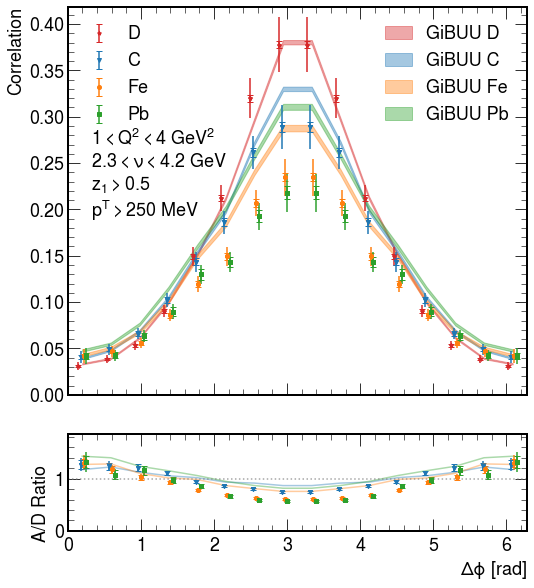

In [791]:
data, GiBUU, sliceinfo = get_values(None,  pThetaCutsGiBUU=True,GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'all')
add_syst_error_from_cuts(data_corr, 'all')
#add_syst_error_from_coulomb(data_corr, 'all')
add_syst_from_mixing(data_corr)
add_syst_from_fbw(data_corr)
all_data_uncorr['all']=data
all_data['all']=data_corr
all_GiBUU['all']=GiBUU
print(sum(all_GiBUU['all'][0]['D_fine'].C)*2*np.pi/16)
print(sum(all_data['all'][0]['D'].C)*2*np.pi/8)

#replace the D calculations with the tweaked
#GiBUU[0]['D']=GiBUU[0]['D_tweak']
all_sliceinfo['all'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag="all")

systematic error on width from endcap: 0.0005951776492802924
systematic error on width from endcap: 0.00015337766596011364
systematic error on width from endcap: 0.0002403364155587848
0    0.211797
1    0.133412
2    0.114863
3    0.078016
4    0.089764
5    0.065050
6    0.064743
7    0.075690
dtype: float64
GiBUU relative stat error 0.16440
GiBUU relative stat error 0.12804
GiBUU relative stat error 0.20852
GiBUU relative stat error 0.15618
GiBUU relative stat error 0.02952
GiBUU relative stat error 0.02962
GiBUU relative stat error 0.04369
GiBUU relative stat error 0.03555
GiBUU relative stat error 0.02945
GiBUU relative stat error 0.03037
GiBUU relative stat error 0.04617
GiBUU relative stat error 0.04023


<ipython-input-780-f0d0e27ae712>:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


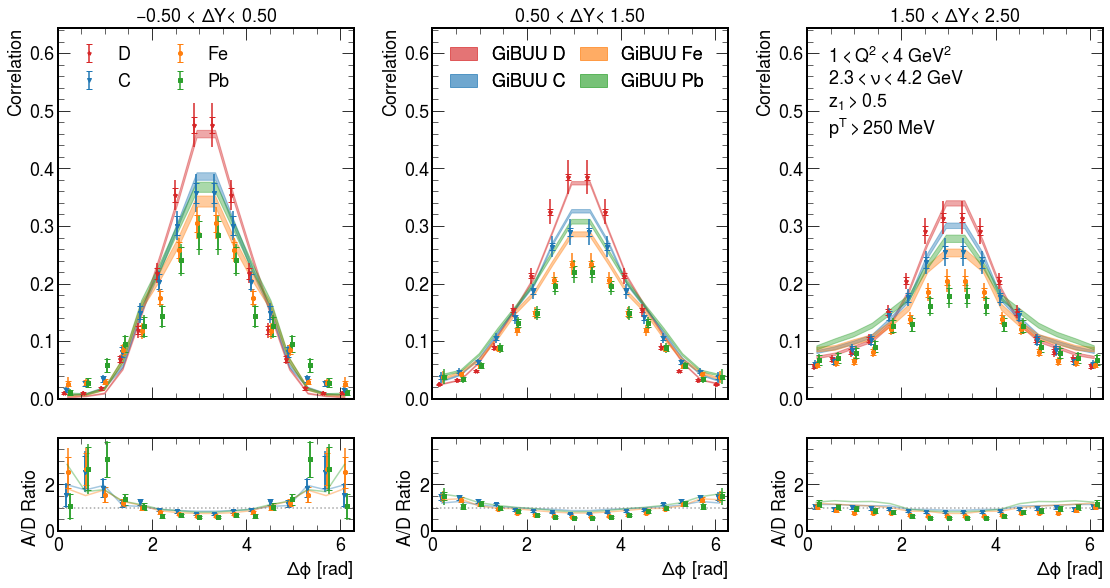

In [792]:
data, GiBUU, sliceinfo = get_values("drap", "\Delta Y", (-0.5, 0.5,1.5, 2.5),GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'dY')
add_syst_error_from_cuts(data_corr, 'dY')
#add_syst_error_from_coulomb(data_corr, 'dY')
add_syst_from_mixing(data_corr)
add_syst_from_fbw(data_corr)
#ghost_bins_correction(data_corr, 'dY', [1])
all_data_uncorr['dY']=data
all_data['dY']=data_corr
all_GiBUU['dY']=GiBUU
all_sliceinfo['dY'] = sliceinfo

print(data_corr[0]['D'].dCsyst/data_corr[0]['D'].C)
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='dY')

systematic error on width from endcap: 0.00011836479547106233
systematic error on width from endcap: 2.9839141338889587e-05
systematic error on width from endcap: 0.0005994085740431042
GiBUU relative stat error 0.02668
GiBUU relative stat error 0.02890
GiBUU relative stat error 0.04459
GiBUU relative stat error 0.03920
GiBUU relative stat error 0.03560
GiBUU relative stat error 0.03478
GiBUU relative stat error 0.05154
GiBUU relative stat error 0.04271
GiBUU relative stat error 0.07858
GiBUU relative stat error 0.05999
GiBUU relative stat error 0.08336
GiBUU relative stat error 0.06352


<ipython-input-780-f0d0e27ae712>:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


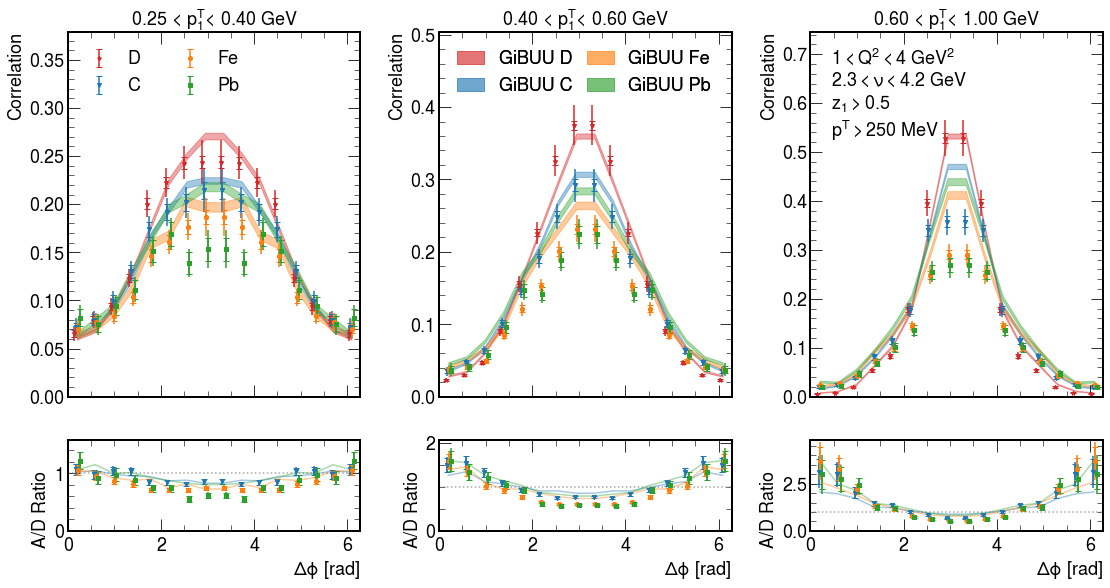

In [793]:
data, GiBUU, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),
                                    GiBUU_suffix=GiBUU_suffix,sliceNh=True)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT1')
add_syst_error_from_cuts(data_corr, 'pT1')
#add_syst_error_from_coulomb(data_corr, 'pT1')
add_syst_from_mixing(data_corr)
add_syst_from_fbw(data_corr)
all_data_uncorr['pT1']=data
all_data['pT1']=data_corr
all_GiBUU['pT1']=GiBUU
all_sliceinfo['pT1'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT1', slice_unit="GeV")

systematic error on width from endcap: 0.0002911674631133371
systematic error on width from endcap: -0.0001022038582595773
systematic error on width from endcap: -0.001327745646936418
GiBUU relative stat error 0.02413
GiBUU relative stat error 0.02533
GiBUU relative stat error 0.03854
GiBUU relative stat error 0.03249
GiBUU relative stat error 0.04002
GiBUU relative stat error 0.03774
GiBUU relative stat error 0.05508
GiBUU relative stat error 0.04568
GiBUU relative stat error 0.25820
GiBUU relative stat error 0.15618
GiBUU relative stat error 0.20852
GiBUU relative stat error 0.15618


<ipython-input-780-f0d0e27ae712>:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


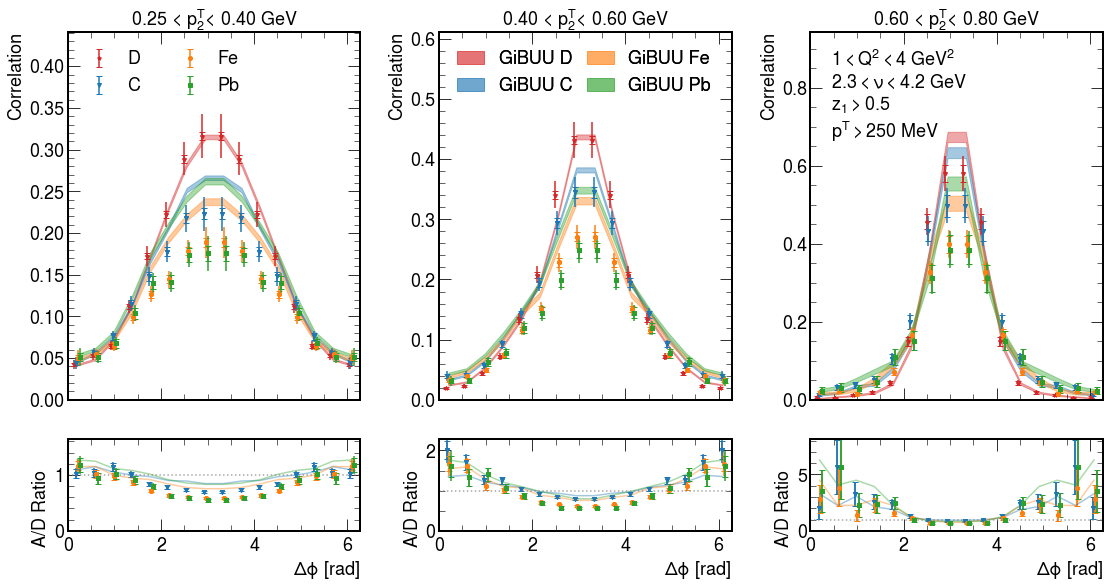

In [794]:
data, GiBUU, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8),
                                    GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT2')
add_syst_error_from_cuts(data_corr, 'pT2')
#add_syst_error_from_coulomb(data_corr, 'pT2')
add_syst_from_mixing(data_corr)
add_syst_from_fbw(data_corr)
all_data_uncorr['pT2']=data
all_data['pT2']=data_corr
all_GiBUU['pT2']=GiBUU
all_sliceinfo['pT2'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT2', slice_unit='GeV')

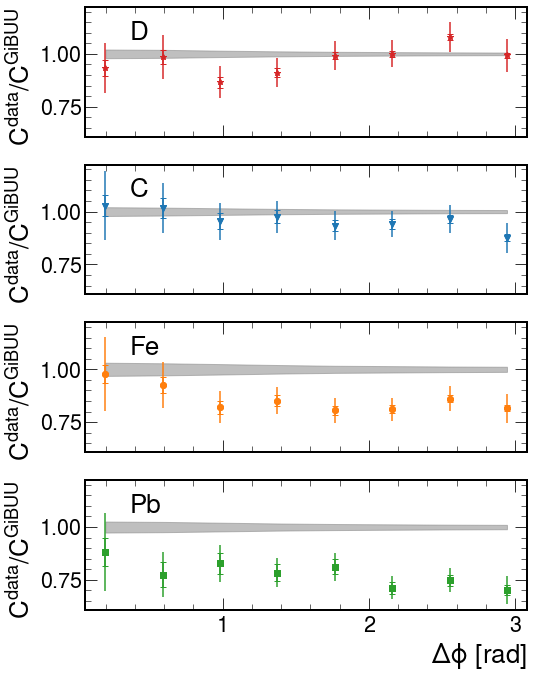

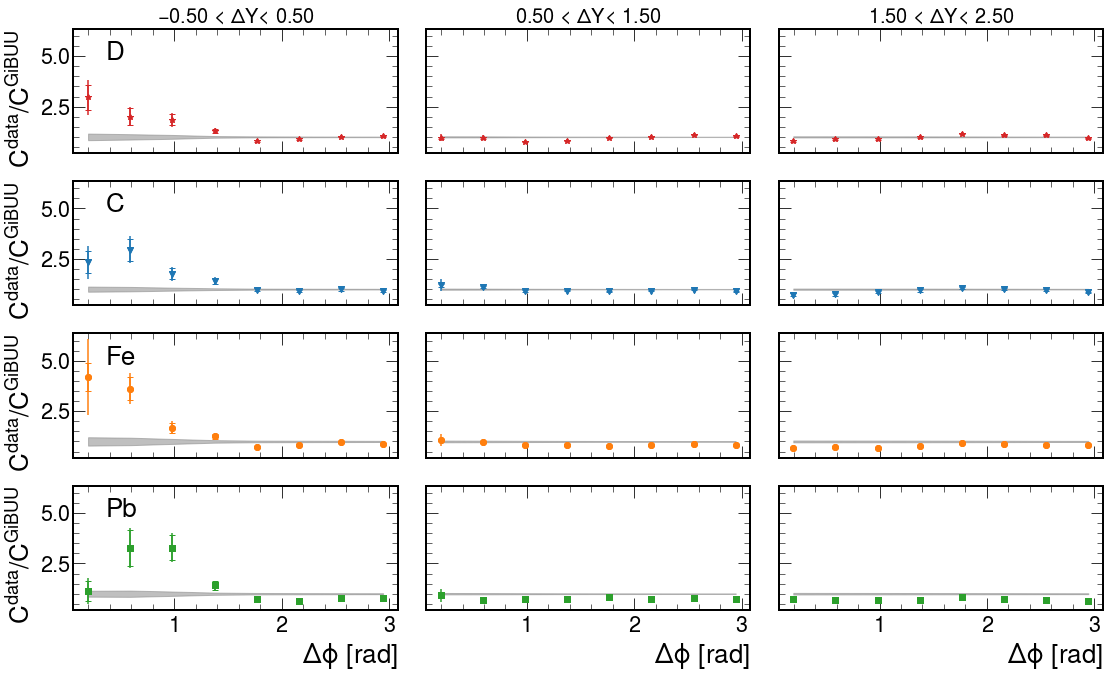

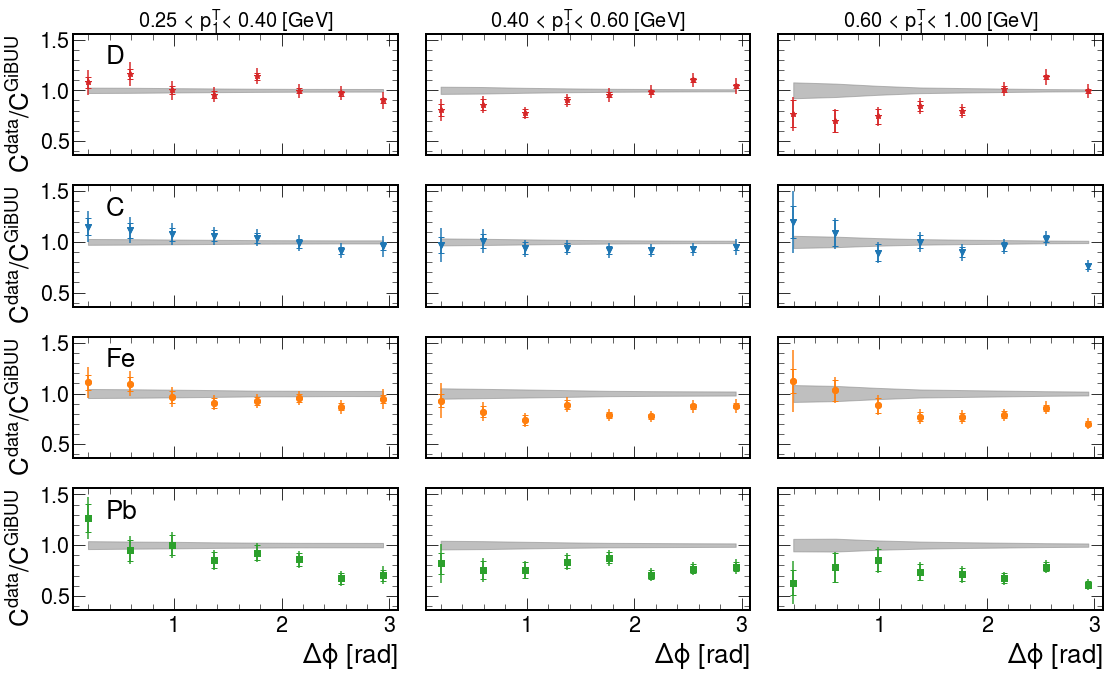

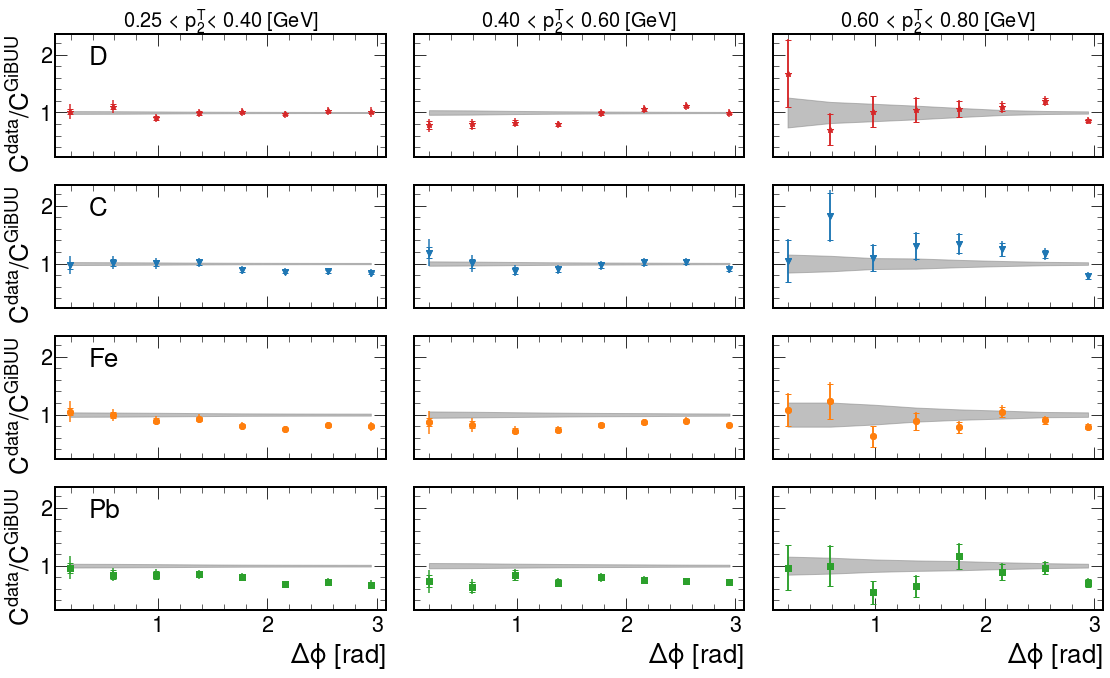

In [795]:
def make_plot_data_over_GiBUU(key):
    fontsize=20
    linestyles='- -- : -. --'.split()
    colors='tab:red tab:blue tab:orange tab:green k'.split()
    markers='*vos*'
    ncol=len(all_data[key])
    figs,axs = plt.subplots(4,ncol, 
               figsize=(8 if ncol==1 else 16,10),sharey='all', sharex='all')
    if ncol==1:
        axs=[[axs[i]] for i in range(4)]
    
    for i,A in enumerate("D C Fe Pb".split()):
        for j in range(ncol):
            plt.sca(axs[i][j])
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3)
            #take into account if there is a missing bin in the data
            aaa=len(all_GiBUU[key][j][A])-len(all_data[key][j][A])
            plt.errorbar(all_data[key][j][A]["phi"],
                         all_data[key][j][A]["C"]/all_GiBUU[key][j][A]["C"][aaa:],
                         all_data[key][j][A]["dCstat"]/all_GiBUU[key][j][A]["C"][aaa:], **arg)
            arg["capsize"]=0
            plt.errorbar(all_data[key][j][A]["phi"],
                         all_data[key][j][A]["C"]/all_GiBUU[key][j][A]["C"][aaa:],
                         np.hypot(all_data[key][j][A]["dCstat"], all_data[key][j][A]["dCsyst"])/all_GiBUU[key][j][A]["C"][aaa:], **arg)
            if j==0:
                plt.ylabel(f"$C^{{\\rm data}}/C^{{\\rm GiBUU}}$")
                plt.text(0.1, 0.75, A, fontsize=fontsize*1.3, transform=plt.gca().transAxes)
            if i == 0:
                plt.title(all_sliceinfo[key][j].replace("-", "$-$") + (" [GeV]" if 'T' in all_sliceinfo[key][j] else ""), fontsize=fontsize)
            if i == 3:
                plt.xlabel("$\Delta\phi$ [rad]")
            tmp=all_GiBUU[key][j][A]["dCstat"]/all_GiBUU[key][j][A]["C"]
            plt.fill_between(all_GiBUU[key][j][A]["phi"], 1-tmp, 1+tmp, color="0.5",
                            alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/data_over_GiBUU/{key}.pdf")
    plt.show()    
for key in all_data:
    make_plot_data_over_GiBUU(key)
            

In [796]:
#_, all_GiBUU['dY_fine'], all_sliceinfo['dY_fine'] = get_values("drap", "\Delta Y", (0,.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2.0))
#_, all_GiBUU['pT1_fine'], all_sliceinfo['pT1_fine'] = get_values("h1_cm_pt", "p^T_{1}", (0.25,0.3, 0.4,0.5, 0.6,.8, 1))
#_, all_GiBUU['pT2_fine'], all_sliceinfo['pT2_fine'] = get_values("h2_cm_pt", "p^T_{2}", (0.25,0.3, 0.4,.5,0.6,.7, 0.8))

In [797]:
for key in all_GiBUU:
    for i in range(len(all_GiBUU[key])):
        for A in "D C Fe Pb".split():
            df=all_GiBUU[key][i][A]
            width=\
                np.sqrt(sum(df.eval(f"C*(phi-{np.pi})**2"))/sum(df.eval("C")))
            all_GiBUU[key][i][f"{A}_width"]=width
            all_GiBUU[key][i][f"{A}_dwidth_stat"]=\
                        np.sqrt(sum(df.dCstat**2*(((df.phi-np.pi)**2-width**2)/sum(df.C))**2))/(2*width)
            if A!= "D":
                all_GiBUU[key][i][f"{A}_broad"]=\
                     np.sqrt(all_GiBUU[key][i][f"{A}_width"]**2-all_GiBUU[key][i][f"D_width"]**2)
                all_GiBUU[key][i][f"{A}_dbroad_stat"]\
                          =np.hypot(all_GiBUU[key][i][f"{A}_width"]*all_GiBUU[key][i][f"{A}_dwidth_stat"],
                                   all_GiBUU[key][i][f"D_width"]*all_GiBUU[key][i][f"D_dwidth_stat"])/\
                                        all_GiBUU[key][i][f"{A}_broad"]

In [798]:
for key in all_data:
    for i in range(len(all_data[key])):
        for A in "D C Fe Pb".split():
            d=all_data[key][i]
            all_data[key][i][A].eval("dCtot=sqrt(dCstat**2+dCsyst**2)",inplace=True)
            if A!= "D":
                all_data[key][i][A].eval("dRtot=sqrt(dRstat**2+dRsyst**2)",inplace=True)
            #print([k for k in d.keys() if "D" in k])
            sources="stat syst_fbw syst_mix syst_cuts syst_mix syst_pid".split()
            d[f"{A}_dwidth_tot"]=\
                np.sqrt(sum([d[f"{A}_dwidth_{source}"]**2 for source in sources \
                             if f"{A}_dwidth_{source}" in d.keys()]))
            d[f"{A}_dwidth_syst"]=\
                np.sqrt(sum([d[f"{A}_dwidth_{source}"]**2 for source in sources[1:] \
                             if f"{A}_dwidth_{source}" in d.keys()]))
            if A!= "D":
                d[f"{A}_dbroad_tot"]=\
                np.sqrt(sum([d[f"{A}_dbroad_{source}"]**2 for source in sources \
                             if f"{A}_dwidth_{source}" in d.keys()]))
                d[f"{A}_dbroad_syst"]=\
                np.sqrt(sum([d[f"{A}_dbroad_{source}"]**2 for source in sources[1:] \
                             if f"{A}_dwidth_{source}" in d.keys()]))

In [799]:
print(np.std([(all_data[key][i][f"{A}_width"]-all_GiBUU[key][i][f"{A}_width"])/\
           all_data[key][i][f"{A}_width"]\
       for A in "D" for i in range(3) for key in list(all_data.keys())[1:]]))

0.04493454063010476


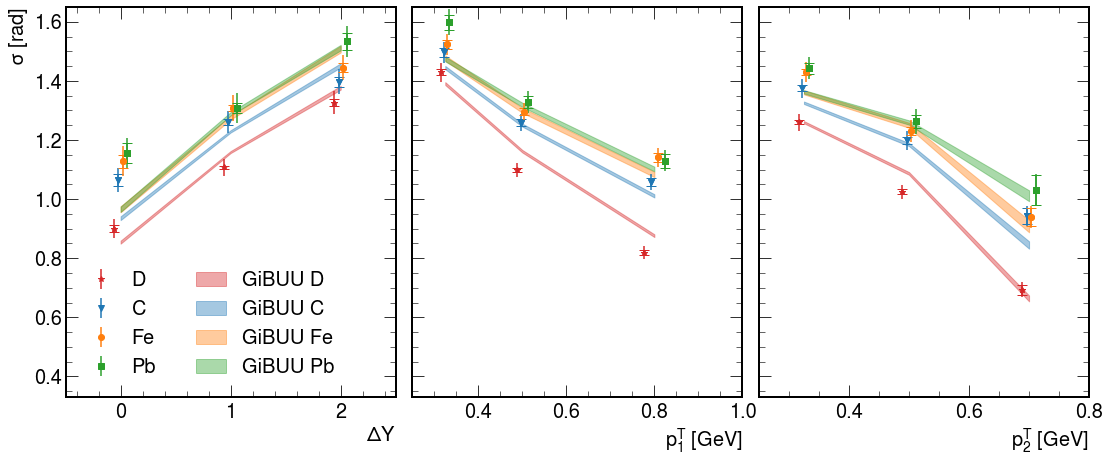

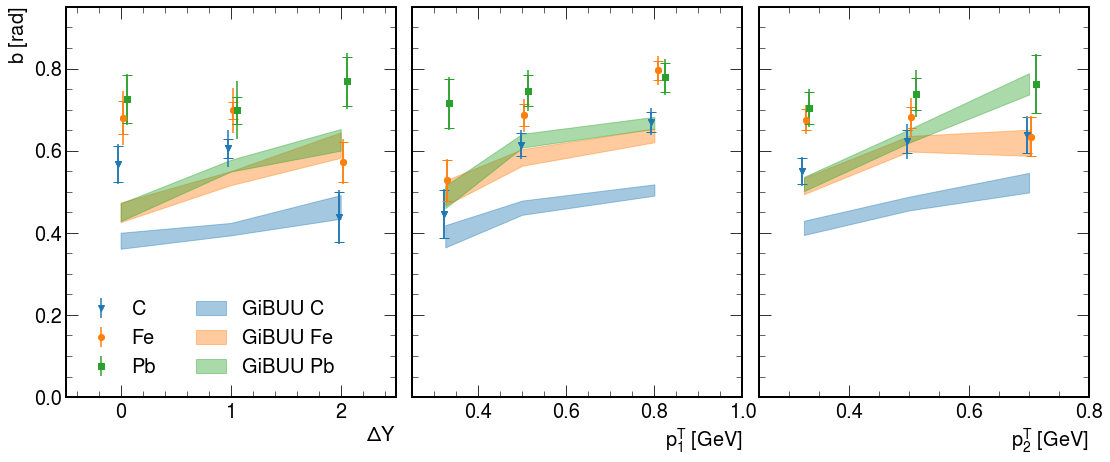

max deviation for D: 0.05107936496737153
max deviation for D: 0.07070360332064318
max deviation for D: 0.06078113357502413
RMS devs: 0.04807153856485765


In [800]:
from scipy.stats import chi2

chi2tot=0

figs = {}
axs = {}

fontsize=20

statkeys = 'widths', 'broads'
for key in statkeys:
    fig, ax= plt.subplots(1,3, figsize=(16, 7), sharey='all')
    figs[key] = fig; axs[key] = ax 
  
varkeys='dY pT1 pT2'.split()
vartex='\Delta Y', 'p^T_1', 'p^T_2'
units = '', '[GeV]', '[GeV]'

linestyles='- -- : -.'.split()
colors='tab:red tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]
artists_b, labels_b=[],[]


for i in range(3):
    key = varkeys[i]
    xlim = float(all_sliceinfo[key][0].split("<")[0]),\
           float(all_sliceinfo[key][len(all_sliceinfo[key])-1].split("<")[2])
    
    for a in axs.values():
        a[i].set_xlim(xlim)
    
    
    #if i == 0:
    #    plt.title(titles[j])
    axs['widths'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)
    axs['broads'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)

    for k in range(4):
        A = "D C Fe Pb".split()[k]
        widths=[]
        dwidths_stat=[]
        dwidths_tot = []
        
        xs=[]
        for l in range(len(all_data[key])):
            
            widths.append(all_data[key][l][A+"_width"])
            dwidths_stat.append(all_data[key][l][A+"_dwidth_stat"])
            dwidths_tot.append(all_data[key][l][A+"_dwidth_tot"])
            r= all_sliceinfo[key][l].split('<')
            r = float(r[0]), float(r[2])
            shift = (r[1]-r[0])*(k-1.5)*.04
            xs.append((r[0]+r[1])/2+shift)

        a=axs['widths'][i].errorbar(xs, widths, dwidths_stat, color=colors[k], marker=markers[k],
                    linestyle='', label =A, capsize=5)
        a=axs['widths'][i].errorbar(xs, widths, dwidths_tot, color=colors[k], marker=markers[k],
                    linestyle='', label =None, capsize=0)
        if i == 0:
            artists.append(a)
            labels.append(A)

        #same for GiBUU:
        widths=[]
        dwidths=[]
        xs_GiBUU=[]
        #suffix="_fine"
        suffix=""
        for l in range(len(all_GiBUU[key+suffix])):

            widths.append(all_GiBUU[key][l][A+"_width"])
            dwidths.append(all_GiBUU[key][l][A+"_dwidth_stat"])
            r= all_sliceinfo[key+suffix][l].split('<')
            r = float(r[0]), float(r[2])
            xs_GiBUU.append((r[0]+r[1])/2)
            
        #a=axs['widths'][i].plot(xs_GiBUU, widths, color=colors[k],
        #            linestyle=linestyles[k], label ="GiBUU "+A)[0]
        arg = dict(color=colors[k], alpha=0.4)
        a=axs['widths'][i].fill_between(xs_GiBUU, np.array(widths)-np.array(dwidths),
                                                           np.array(widths)+np.array(dwidths) , 
                                                            **arg, label=f"GiBUU {A}")
        #artists.append(a)
        #GiBUU_widths[A, key] = pd.DataFrame({"xs": xs, "width":widths})
        if i == 0:
            artists.append(a)
            labels.append("GiBUU "+A)
            #pass
    chi2_for_key=0
    
    #bs=[]
    #dbstats=[]
    #dbsysts=[]
    for k in range(1,4):
        A = "D C Fe Pb".split()[k]
        xs=[]
        bs=[]
        dbs_stat=[]
        dbs_tot=[]
        bs_GiBUU=[]
        dbs_GiBUU=[]
        xs_GiBUU=[]
        for l in range(len(all_data[key])):
            
            bs.append(all_data[key][l][A+"_broad"])
            bs_GiBUU.append(all_GiBUU[key][l][A+"_broad"])
            dbs_GiBUU.append(all_GiBUU[key][l][A+"_dbroad_stat"])
            dbs_stat.append(all_data[key][l][A+"_dbroad_stat"])
            dbs_tot.append(all_data[key][l][A+"_dbroad_tot"])
            r= all_sliceinfo[key][l].split('<')
            r = float(r[0]), float(r[2])
            shift = (r[1]-r[0])*(k-1.5)*.04
            xs.append((r[0]+r[1])/2+shift)
            xs_GiBUU.append((r[0]+r[1])/2)
        
        a=axs['broads'][i].errorbar(xs, bs, dbs_stat, color=colors[k], marker=markers[k],
                    linestyle='', label =A, capsize=5)
        a=axs['broads'][i].errorbar(xs, bs, dbs_tot, color=colors[k], marker=markers[k],
                    linestyle='', label =None, capsize=0)
        if i == 0:
            artists_b.append(a)
            labels_b.append(A)
        #a=axs['broads'][i].plot(xs_GiBUU, bs_GiBUU, color=colors[k],
        #            linestyle=linestyles[k], label ="GiBUU "+A)
        arg = dict(color=colors[k], alpha=0.4)
        a=axs['broads'][i].fill_between(xs_GiBUU, np.array(bs_GiBUU)-np.array(dbs_GiBUU),
                                                  np.array(bs_GiBUU)+np.array(dbs_GiBUU), 
                                                            **arg, label=f"GiBUU {A}")
        if i == 0:
            artists_b.append(a)
            labels_b.append("GiBUU "+A)
        
        
        axs['broads'][i].set_ylim(0, 0.95)
        #data_broadenings[A,key]=pd.DataFrame(dict(b=y, dbstat=dbstat, dbsyst=dbsyst))
    #print("chi2=", chi2_for_key,"   ndof=", 3*(len(y)-1), chi2.cdf(chi2_for_key,3*(len(y)-1)))
axs['widths'][0].set_ylabel("$\sigma$ [rad]", fontsize=fontsize)
axs['broads'][0].set_ylabel("$b$ [rad]", fontsize=fontsize)

for axlist in axs['widths'], axs['broads']:
    for ax in axlist:
        ax.tick_params(axis='both', labelsize=fontsize)

indices = [0,2,4, 6, 1,3, 5,7]
axs['widths'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)

axs['widths'][0].set_ylim(0.33, 1.65)
indices = [0, 2,4, 1,3, 5]
axs['broads'][0].legend([artists_b[i] for i in indices], 
                        [labels_b[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)


axs['broads'][i].set_ylim(0, 0.95)
figs['widths'].tight_layout()
figs['widths'].subplots_adjust(wspace=0.05)
figs['broads'].tight_layout()
figs['broads'].subplots_adjust(wspace=0.05)
for plotdir in '/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/',"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/":
    figs['widths'].savefig(plotdir+"/widths.pdf")
    figs['broads'].savefig(plotdir+"/diffwidths.pdf")

plt.show()
#print("chi2=", chi2tot,"   ndof=21", chi2.cdf(chi2tot,21))

sumDev2=0
n=0
for key in "dY pT1 pT2".split():
    devs2 = [(1-all_GiBUU[key][i]["D_width"]/all_data[key][i]["D_width"])**2 \
            for i in range(len(all_GiBUU[key]))]
    sumDev2+=sum(devs2)
    n+=len(devs2)
    print("max deviation for D:", np.max(np.sqrt(devs2)))
print("RMS devs:", np.sqrt(sumDev2/n))

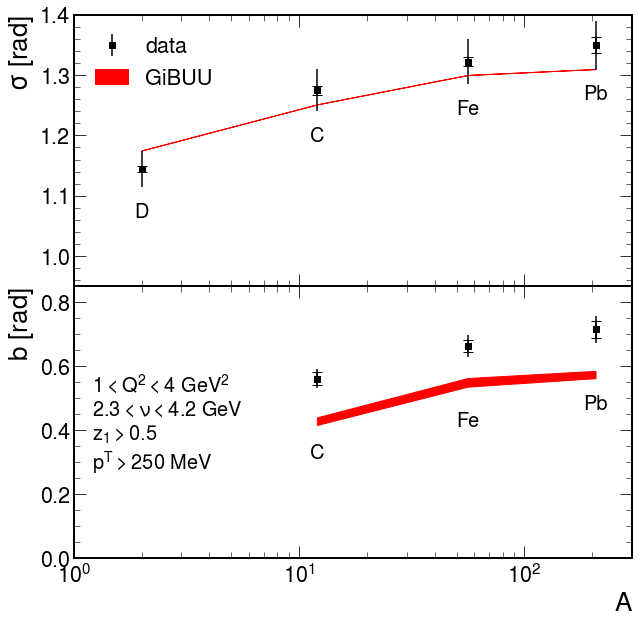

In [801]:
fig, axs=plt.subplots(2,1, sharex='all')

fontsize=20


linestyles='- -- : -.'.split()
colors='tab:red tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]

key = 'all'

As=[2,12, 56, 207]

    
plt.sca(axs[0])
widths=[all_data['all'][0][f"{A}_width"] for A in "D C Fe Pb".split()]
widths_GiBUU=[all_GiBUU['all'][0][f"{A}_width"] for A in "D C Fe Pb".split()]
dwidths_GiBUU=[all_GiBUU['all'][0][f"{A}_dwidth_stat"] for A in "D C Fe Pb".split()]
dwidths_tot=[all_data['all'][0][f"{A}_dwidth_tot"] for A in "D C Fe Pb".split()]
dwidths_stat=[all_data['all'][0][f"{A}_dwidth_stat"] for A in "D C Fe Pb".split()]
plt.ylim(0.95, 1.4)

plt.errorbar(As, widths,dwidths_stat, marker='s', linestyle='', capsize=5, color='k')
plt.errorbar(As, widths,dwidths_tot, marker='s', linestyle='', color='k')
#plt.plot(As,widths_GiBUU, color='r')
curve=plt.fill_between(As, widths_GiBUU+np.array(dwidths_GiBUU), 
                       widths_GiBUU+np.array(dwidths_GiBUU), color='r', label='GiBUU')
plt.xscale('log')
plt.ylabel('$\\sigma$ [rad]')
plt.sca(axs[1])

bs=[all_data['all'][0][f"{A}_broad"] for A in "C Fe Pb".split()]
dbs_stat=[all_data['all'][0][f"{A}_dbroad_stat"] for A in "C Fe Pb".split()]
dbs_tot=[all_data['all'][0][f"{A}_dbroad_tot"] for A in "C Fe Pb".split()]
plt.errorbar(As[1:], bs, dbs_stat, 
             marker='s', linestyle='', capsize=5, color='k')

eb=plt.errorbar(As[1:], bs, dbs_tot, marker='s', 
             linestyle='', capsize=0, color='k', label="data")

bs_GiBUU=[all_GiBUU['all'][0][f"{A}_broad"] for A in "C Fe Pb".split()]
dbs_GiBUU=[all_GiBUU['all'][0][f"{A}_dbroad_stat"] for A in "C Fe Pb".split()]
#curve=plt.plot(As[1:], bs_GiBUU, color='r', label='GiBUU')[0]
curve=plt.fill_between(As[1:], bs_GiBUU-np.array(dbs_GiBUU), bs_GiBUU+np.array(dbs_GiBUU), color='r', label='GiBUU')


#plt.errorbar(As, widths,dwidths_tot, marker='o', linestyle='', color='k')
plt.xscale('log')
plt.xlabel('A')
plt.ylabel('$b$ [rad]')
plt.ylim(0,0.85)
plt.xlim(1, 300)
plt.subplots_adjust(hspace=0)

for A,lbl,y  in zip(As, "D C Fe Pb".split(), widths-np.array(dwidths_tot)):
    #y=(widths-dwidths_tot)[0]
    axs[0].text(A, y-.05,lbl,horizontalalignment="center", fontsize=fontsize)

for A,lbl,y  in zip(As[1:], "C Fe Pb".split(), bs):
    #y=(widths-dwidths_tot)[0]
    axs[1].text(A, y-.25,lbl,horizontalalignment="center", fontsize=fontsize)    
    
cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
axs[1].text(1.2, 0.2, cuts_txt, fontsize=fontsize)
#print(list(eb))
#print(curve)
axs[0].legend(handles=[eb,curve], framealpha=0)
plt.savefig("/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/widths_1d.pdf")
plt.savefig("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/widths_1d.pdf")
plt.show()

In [802]:
with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/uncertainties_CR.tex", "w") as f:
        
    names = ["_stat",None, "_syst_pid", "_syst_cuts", "_syst_mix", "_syst_EC","Luminosity",
              "Trigger efficiency", "Time dependent effects", "Coulomb effects",
              "Bin migration",None, "_syst",None, "_tot"]
    displaynames={"_stat":"Statistics","_syst_pid":"Particle misid.", "_syst_mix":"Pair acceptance", "_syst_EC":"Endcaps",
                  "_syst":"Syst. subtotal", "_tot": "Total", "_syst_cuts": "Event selection"}
    corrtype={"_stat":"N & p2p","_syst_pid":"Y & p2p", "_syst_mix":"Y & p2p", "_syst_EC":"N & p2p",
                  "_syst":"-- & --", "_tot": "-- & --", "_syst_cuts": "Y & p2p" }
    for source in names:
        if not source:
            print("\\hline", file=f)
            continue
        if source not in displaynames:
            print(source + " & negligible & negligible & -- & -- & negligible \\\\", file=f)
            continue

        for obs in "C", "R":
            for As in ("D","C Fe Pb".split()):
                vals=[]
                if As[0]=="D" and obs=="R":
                    continue
                for A in As:
                    for key in all_data:
                        for i in range(len(all_data[key])):

                            #if f"{A}_d{obs}{source}" not in all_data[key][i].keys():
                            #    continue
                            #print(all_data[key][i][A].columns)
                            if not f"d{obs}{source[1:]}" in all_data[key][i][A].columns:
                                continue
                            vals+=list(abs(all_data[key][i][A].eval(f"d{obs}{source[1:]}/{obs}")))
                if As=="D":
                    minCD=np.min(vals)
                    maxCD=np.max(vals)
                elif obs=="C":
                    minCA=np.min(vals)
                    maxCA=np.max(vals)
                else:
                    minR=np.min(vals)
                    maxR=np.max(vals)
                print(source,"median", As, obs, "%.1f %%"%(100*np.median(vals)))
        print(f"{displaynames[source]} & {minCD*100:.1f}$-${maxCD*100:.1f}\\% &  {minCA*100:.1f}$-${maxCA*100:.1f}\\% & {corrtype[source]} &  {minR*100:.1f}$-${maxR*100:.1f}\\% \\\\",
             file=f)
                #print("D" if As[0]=="D" else "A",obs, source+"\t", "%.3f"%np.min(vals), "%.3f"%np.median(vals), "%.3f"%np.max(vals))

_stat median D C 3.6 %
_stat median ['C', 'Fe', 'Pb'] C 6.1 %
_stat median ['C', 'Fe', 'Pb'] R 7.3 %
_syst_pid median D C 0.8 %
_syst_pid median ['C', 'Fe', 'Pb'] C 1.3 %
_syst_pid median ['C', 'Fe', 'Pb'] R 0.4 %
_syst_cuts median D C 3.2 %
_syst_cuts median ['C', 'Fe', 'Pb'] C 3.2 %
_syst_cuts median ['C', 'Fe', 'Pb'] R 1.4 %
_syst_mix median D C 6.2 %
_syst_mix median ['C', 'Fe', 'Pb'] C 6.2 %
_syst_mix median ['C', 'Fe', 'Pb'] R 2.0 %
_syst_EC median D C 0.2 %
_syst_EC median ['C', 'Fe', 'Pb'] C 0.0 %
_syst_EC median ['C', 'Fe', 'Pb'] R 0.2 %
_syst median D C 7.3 %
_syst median ['C', 'Fe', 'Pb'] C 7.4 %
_syst median ['C', 'Fe', 'Pb'] R 2.7 %
_tot median D C 8.2 %
_tot median ['C', 'Fe', 'Pb'] C 10.0 %
_tot median ['C', 'Fe', 'Pb'] R 8.0 %


In [803]:
# names = "_stat",None, "_syst_pid", "_syst_cuts", "_syst_mix", "_syst_EC","Luminosity",
#           "Trigger efficiency", "Time dependent effects", "Coulomb effects",
#           "Bin migration",None, "_syst",None, "_tot"
# displaynames={"_stat":"Statistics","_syst_pid":"Particle misid.", "_syst_mix":"Pair acceptance", "_syst_EC":"Endcaps",
#               "_syst":"Syst. subtotal", "_tot": "Total"}

# Statistics & 1.1$-$38.8\% & 1.8\%$-$43.8\% & N & p2p & 2.2$-$52.7\%\\
#         \hline
#         Event selection& 0.5$-$11.7\% & 0.5$-$11.7\% & Y & p2p & 0.5$-$51.5\% \\
#         Pair acceptance & 6.2\% & 6.2\%  & Y & p2p & 2.0\% \\
#         Endcaps & <2.6\% & 0\% & N & p2p & <2.6\% \\
#         Particle misid.~& $<$16.7\% & $<$40.5\% & Y & p2p &$<$28.6\% \\
#          Luminosity & negligible & negligible  & -- & -- & negligible\\
#          Trigger efficiency & negligible & negligible & -- & -- & negligible  \\
#          Time-dependent effects& negligible & negligible & -- & -- & negligible \\
#          Coulomb effects~& negligible & negligible & -- & -- & negligible \\
#          Bin-migration & negligible & negligible & -- & -- & negligible \\
#          \hline
#          syst.~subtotal & 6.3$-$18.4\% & 6.4$-$41.2\% & -- & -- & 2.2$-$52.2\% \\
#          \hline 
#          total 

In [804]:
with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/uncertainties_sb.tex", "w") as f:
        
    names = ["_stat",None, "_syst_pid", "_syst_cuts", "_syst_mix", "_syst_EC", "_syst_fbw","Luminosity",
              "Trigger efficiency", "Time dependent effects", "Coulomb effects",
              "Bin migration",None, "_syst",None, "_tot"]
    displaynames={"_stat":"Statistics","_syst_pid":"Particle misid.", "_syst_mix":"Pair acceptance", "_syst_EC":"Endcaps",
                  "_syst":"Syst. subtotal", "_tot": "Total", "_syst_cuts": "Event selection",
                 "_syst_fbw": "Finite bin width"}
    corrtype={"_stat":"N","_syst_pid":"Y", "_syst_mix":"Y", "_syst_EC":"N",
                  "_syst":"Y", "_tot": "Y", "_syst_cuts": "Y", "_syst_fbw": "Y" }

    for source in names:
        if not source:
            print ("\\hline", file=f)
            continue
        if source not in displaynames:
            print(source + " & negligible & negligible & -- & negligible \\\\", file=f)
            continue
        for obs in "width broad".split():
            for As in ("D","C Fe Pb".split()):
                vals=[]
                for A in As:

                    for key in all_data:
                        for i in range(len(all_data[key])):
                            if f"{A}_d{obs}_syst_ghost" in all_data[key][i].keys():
                                all_data[key][i][f"{A}_d{obs}_syst_ghost_pid"]=np.hypot(all_data[key][i][f"{A}_d{obs}_syst_ghost"],
                                                                       all_data[key][i][f"{A}_d{obs}_syst_pid"])


                            if f"{A}_d{obs}{source}" not in all_data[key][i].keys():
                                continue
                            vals.append(abs(all_data[key][i][f"{A}_d{obs}{source}"]/\
                                        all_data[key][i][f"{A}_{obs}"]))
                if len(vals)==0:
                    continue
                if As=="D":
                    minsD=np.min(vals)
                    midsD=np.median(vals)
                    maxsD=np.max(vals)
                elif obs=="width":
                    minsA=np.min(vals)
                    midsA=np.median(vals)
                    maxsA=np.max(vals)
                else:
                    minb=np.min(vals)
                    midb=np.median(vals)
                    maxb=np.max(vals)
                print(source, "median", As, obs, "%.1f %%"%(100*np.median(vals)))
        print(f"{displaynames[source]} & {minsD*100:.1f}$-${maxsD*100:.1f}\\% &  {minsA*100:.1f}$-${maxsA*100:.1f}\\% & {corrtype[source]} &  {minb*100:.1f}$-${maxb*100:.1f}\\% \\\\",
             file=f)
        #print("D" if As[0]=="D" else "A",obs, source+"\t", "%.3f"%np.min(vals), "%.3f"%np.median(vals), "%.3f"%np.max(vals))

_stat median D width 0.7 %
_stat median ['C', 'Fe', 'Pb'] width 1.2 %
_stat median ['C', 'Fe', 'Pb'] broad 5.2 %
_syst_pid median D width 0.3 %
_syst_pid median ['C', 'Fe', 'Pb'] width 0.9 %
_syst_pid median ['C', 'Fe', 'Pb'] broad 2.7 %
_syst_cuts median D width 1.6 %
_syst_cuts median ['C', 'Fe', 'Pb'] width 1.6 %
_syst_cuts median ['C', 'Fe', 'Pb'] broad 1.2 %
_syst_mix median D width 1.1 %
_syst_mix median ['C', 'Fe', 'Pb'] width 1.1 %
_syst_mix median ['C', 'Fe', 'Pb'] broad 1.4 %
_syst_EC median D width 0.0 %
_syst_EC median ['C', 'Fe', 'Pb'] width 0.0 %
_syst_EC median ['C', 'Fe', 'Pb'] broad 0.1 %
_syst_fbw median D width 0.4 %
_syst_fbw median ['C', 'Fe', 'Pb'] width 0.2 %
_syst_fbw median ['C', 'Fe', 'Pb'] broad 0.4 %
_syst median D width 2.4 %
_syst median ['C', 'Fe', 'Pb'] width 2.5 %
_syst median ['C', 'Fe', 'Pb'] broad 3.7 %
_tot median D width 2.6 %
_tot median ['C', 'Fe', 'Pb'] width 3.0 %
_tot median ['C', 'Fe', 'Pb'] broad 7.4 %


In [805]:
dphi_bins=8
for obs in "CR":
    for key in all_data:
        with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/{key}_{obs}_data.tex", "w") as f:
            #print(all_sliceinfo[key])
            for i, slice_data in enumerate(all_data[key]):
                theformat="%s & %.2f<$\\Delta\\phi$ %.2f %.2"
                #print("\\hline",file=f)
                for j in range(dphi_bins):
                    
                    line=""
                    if j == 0 and key != "all":
                        split=all_sliceinfo[key][i].split()
                        line+="$"+split[0]+"-"+split[-1]+"$"
                        #line += all_sliceinfo[key][i]
                    line += f" & ${j*np.pi/8:.2f}-{(j+1)*np.pi/8:.2f}$"
                    
                    #account for missing bins
                    if j == 0 and len(all_data[key][i]["D"])==7:
                        if obs=="C":
                            line +=" & --"
                        line +=" & -- & -- & -- \\\\" 
                        print(line, file=f)
                        continue
                    
                    
                    for A in "D C Fe Pb".split():
                        if A=="D" and obs=="R":
                            continue
                        #print(all_data[key][i][A])
                        data=all_data[key][i][A]
                        line += f" & {data[obs][j]:.3f}$\\pm${data[f'd{obs}stat'][j]:.3f}$\\pm${data[f'd{obs}syst'][j]:.3f}"
                    line +=" \\\\"
                    print(line, file=f)
                print("\\hline", file=f)
        #print(f"{} & ", file=f)

In [806]:
# counts tables
dphi_bins=8
for key in all_data:
    with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/{key}_counts_data.tex", "w") as f:
        #print(all_sliceinfo[key])
        for i, slice_data in enumerate(all_data[key]):
            line = ""
            if  key != "all":
                split=all_sliceinfo[key][i].split()
                line+="$"+split[0]+"-"+split[-1]+"$"
            line +=" & $N_{h}$ "
            for A in "D C Fe Pb".split():    
                #print(all_data[key][i][A])
                data=all_data[key][i][A]
                line += f" & {data['N1'][0]}"
            line +=" \\\\"
            print(line, file=f)
            
            #theformat="%s & %.2f<$\\Delta\\phi$ %.2f %.2"
            #print("\\hline",file=f)
            for j in range(dphi_bins):

                line=""
                
                    #line += all_sliceinfo[key][i]
                line += f" & ${j*np.pi/8:.2f}-{(j+1)*np.pi/8:.2f}$"


                for A in "D C Fe Pb".split():
                    
                    #print(all_data[key][i][A])
                    data=all_data[key][i][A]
                    line += f" & {data['N2h'][j]}"
                line +=" \\\\"
                print(line, file=f)
            print("\\hline", file=f)

In [807]:
for obs in "width broad".split():
    with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/{obs}_data.tex", "w") as f:
        for key in "all dY pT1 pT2".split():
            for i in range(len(all_sliceinfo[key])):
                line=all_sliceinfo[key][i] if key != "all" else "Integrated result"
                if "pT" in key:
                    line +=" GeV"

                for A in "D C Fe Pb".split():
                    d=all_data[key][i]
                    if A=="D" and obs=="broad":
                        continue
                    #print(A, key)
                    #print(type(d.dbstat[i]))
                    #print(d.columns)
                    #if "dwidths_syst" not in d.columns:
                    #    d.eval("dwidths_syst=sqrt(dwidths_tot**2-dwidths_stat**2)",inplace=True)
                    line += f"& {d[f'{A}_{obs}']:.3f}$\\pm${d[f'{A}_d{obs}_stat']:.3f}$\\pm${d[f'{A}_d{obs}_syst']:.3f}"

                line +="\\\\"
                print(line, file=f)
            print("\\hline", file=f)

all
dY
pT1
pT2


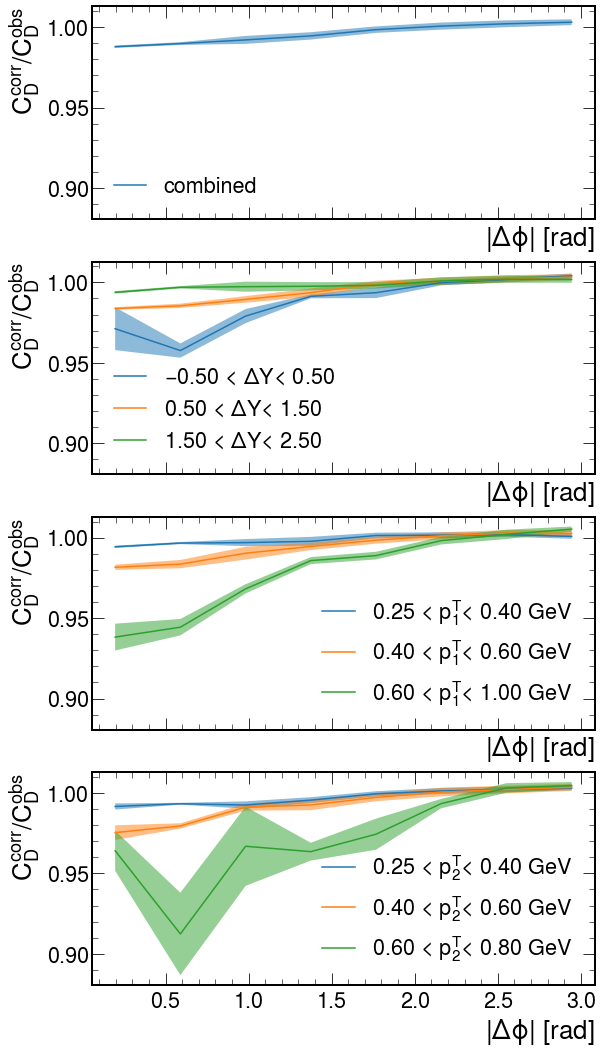

In [808]:
# endcap correction plot
fig, axs = plt.subplots(4, 1, figsize=(9, 18), sharey='all', sharex='all')
for j,(key, nbins) in enumerate([("all", 1), ("dY", 3), ("pT1", 3), ("pT2", 3)]):
    plt.sca(axs[j])
    print(key)
    
    for i in range(nbins):
        df = all_data[key][i]['D']
        x= df.phi
        dx=x[1]-x[0]
        y = df.C/(df.C-df.C_correction_EC)
        dy = df.dCsyst_EC/df.C
        
        
        if key == 'all':
            label = "combined"
        else:
            label = all_sliceinfo[key][i].replace("-", "$-$") + (" GeV" if 'T' in all_sliceinfo[key][i] else "") 
        plt.plot(x, y, label=label)
        
        plt.fill_between(x, y-dy, y+dy, alpha=0.5)
        
        plt.xlabel("$|\Delta\phi|$ [rad]")
        plt.ylabel("$C^{\\rm corr}_D/C^{\\rm obs}_D$")
        
        #print(yDcorr/yD)
        #print(np.sqrt(np.mean((yDcorr/yD-1)**2)), fAl*np.sqrt(np.mean(((yC-yFe)/yAl/2)**2)))
    plt.legend()
plt.show()

In [809]:
[dfs_pair['D'].drap.quantile(a) for a in (0.03, 1/3, 2/3, .97)]

[-0.0025805619273184407,
 1.0094579865714843,
 1.663808517024116,
 2.703511273920278]

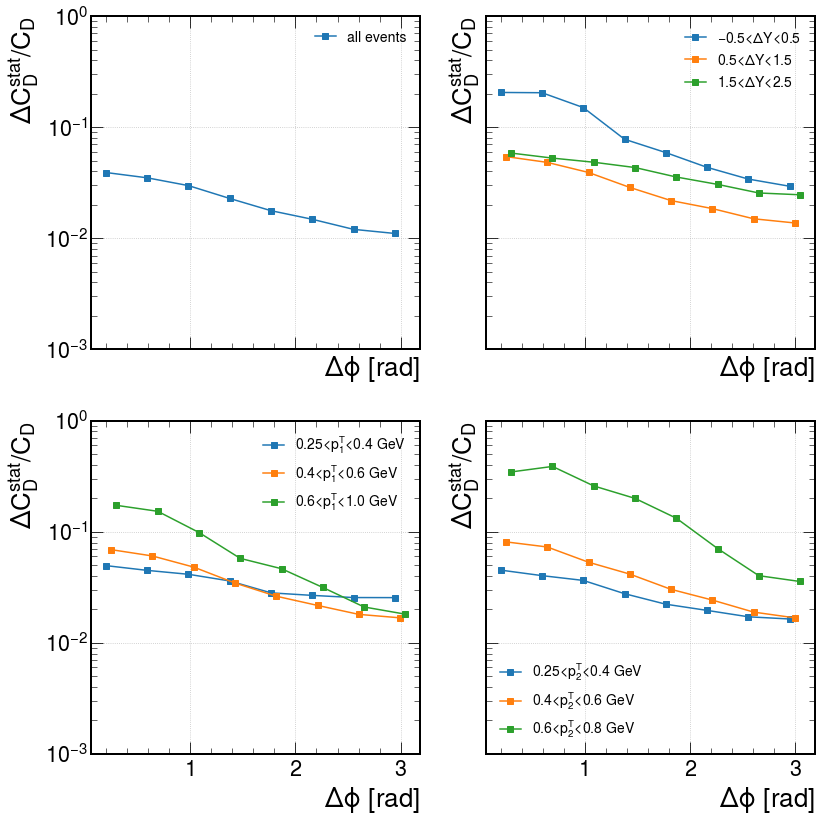

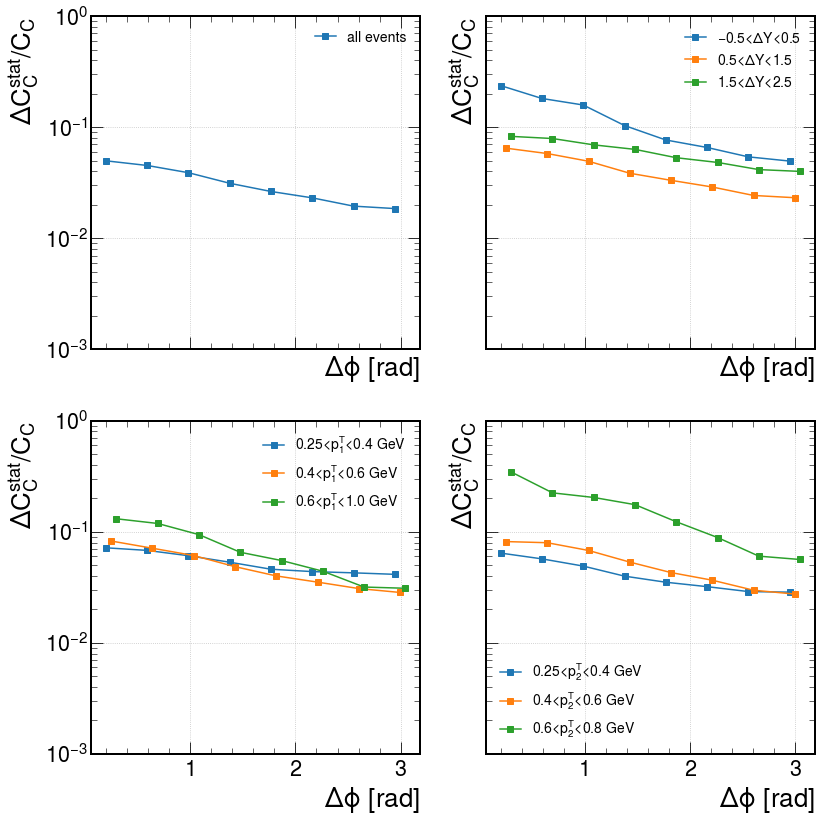

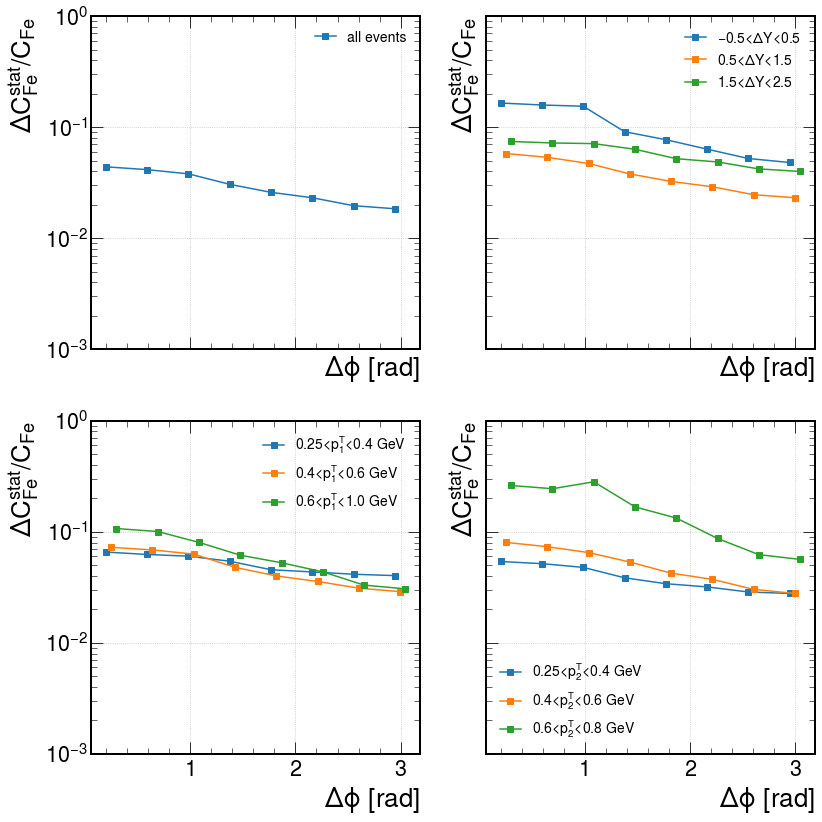

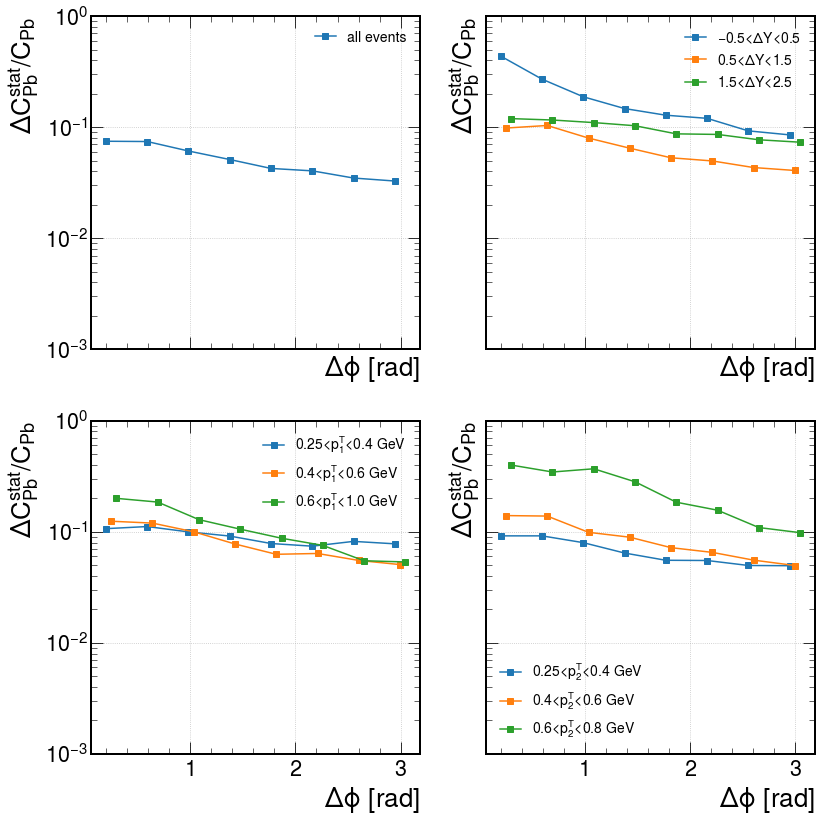

In [810]:
for A in "D C Fe Pb".split():
    #print(cut_syst_table)
    keys = "all dY pT1 pT2".split()

    j = 0
    fig, axs=plt.subplots(2,2, figsize=(12, 12), sharex = True, sharey=True)


    labels = "all events;$-$0.5<$\Delta Y$<0.5;0.5<$\Delta Y$<1.5;1.5<$\Delta Y$<2.5;"
    labels+= "0.25<$p^T_1$<0.4 GeV;0.4<$p^T_1$<0.6 GeV;0.6<$p^T_1$<1.0 GeV;"
    labels+= "0.25<$p^T_2$<0.4 GeV;0.4<$p^T_2$<0.6 GeV;0.6<$p^T_2$<0.8 GeV"
    labels= labels.split(";")

    shift=0

    k=0
    for i, label in enumerate(labels):
        plt.sca(axs[j//2][j%2])

        #n=n+0.5*(n==0)
        x= np.linspace(0, np.pi, 9)
        x= (x[1:]+x[:-1])/2+shift
        y=all_data[keys[j]][k][A].eval("dCstat/C")
        plt.errorbar(x, y, label=label, marker='s')

        if i in (0, 3, 6, 9):
            plt.xlabel("$\Delta\phi$ [rad]")
            plt.ylabel(f"$\Delta C^{{\\rm stat}}_{{{A}}}/C_{{{A}}}$")
            plt.legend(fontsize=14)
            plt.yscale('log')
            plt.grid()
            plt.ylim(1e-3, 1)
            shift=0
            j+=1
            k=0
        else:
            shift +=0.05
            k+=1
    plt.tight_layout()
    plt.show()

A
A


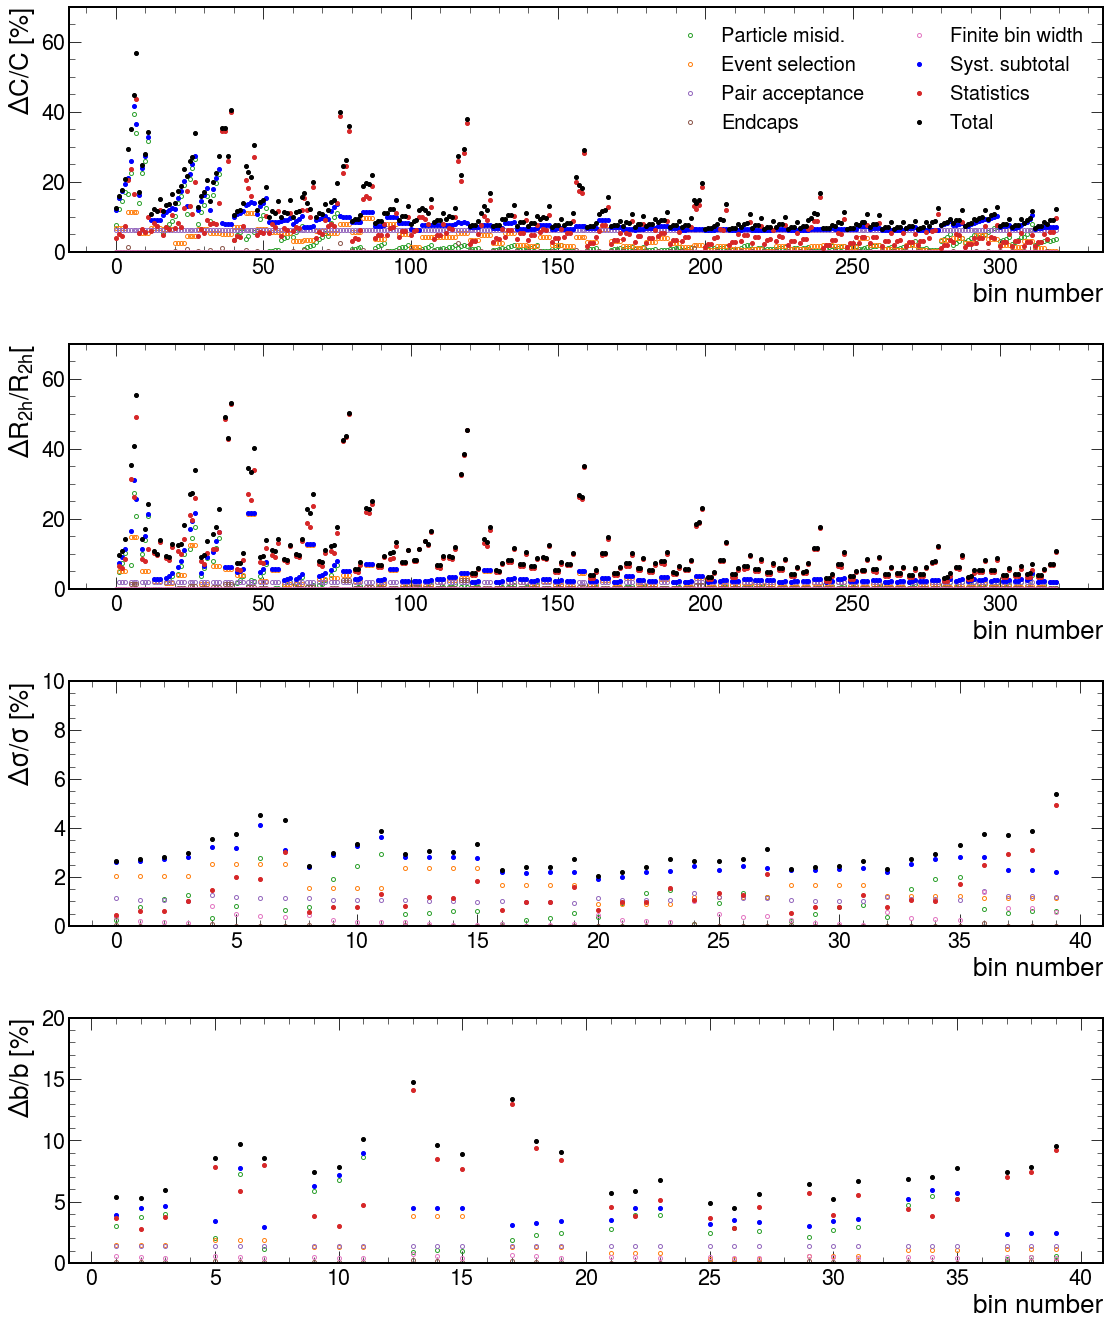

In [811]:
fig, axs=plt.subplots(4,1,figsize=(16,19), sharey='row', sharex='row')

names = ["_syst_pid", "_syst_cuts", "_syst_mix", "_syst_EC", "_syst_fbw", "_syst","_stat", "_tot"]
displaynames={"_stat":"Statistics","_syst_pid":"Particle misid.", "_syst_mix":"Pair acceptance", "_syst_EC":"Endcaps",
              "_syst":"Syst. subtotal", "_tot": "Total", "_syst_cuts": "Event selection",
             "_syst_fbw": "Finite bin width"}
corrtype={"_stat":"N & p2p","_syst_pid":"Y & p2p", "_syst_mix":"Y & p2p", "_syst_EC":"N & p2p",
              "_syst":"-- & --", "_tot": "-- & --", "_syst_cuts": "Y & p2p" }
colors={"_stat": "tab:red", "_tot": "k", "_syst": "b", "_syst_pid":"tab:green", 
        "_syst_cuts": "tab:orange", "_syst_mix":"tab:purple", "_syst_EC": "tab:brown",
       "_syst_fbw":"tab:pink"}

for source in names:
    
    for obs in "C", "R", "width", "broad":
        if obs in "CR" and source=="_syst_fbw":
            if obs == "C":
                ax=axs[0]
            else:
                ax = axs[1]
            ax.plot(np.arange(320),[0]*320, color=colors[source], linestyle='', marker="o", ms=4,
                           label=displaynames[source],
                           fillstyle='full' if source in "_stat,_tot,_syst" else "none")
            print("A")
            continue
        for iA, A in enumerate("D C Fe Pb".split()):
            vals=[]
            if A=="D" and (obs=="R" or obs=="broad"):
                continue
            j=0
            
            for key in all_data:
                for i in range(len(all_data[key])):

                    #if f"{A}_d{obs}{source}" not in all_data[key][i].keys():
                    #    continue
                    #print(all_data[key][i][A].columns)
                    if obs in "CR":
                        #if not f"d{obs}{source[1:]}" in all_data[key][i][A].columns:
                        #    continue
                        y=list(abs(all_data[key][i][A].eval(f"d{obs}{source[1:]}/{obs}")))
                        x=(j*4+iA)+np.arange(0,8)*40
                        if obs =="C":
                            ax=axs[0]
                        else :
                            ax=axs[1]
                        
                        
                    else :
                        y=abs(all_data[key][i][f"{A}_d{obs}{source}"]/\
                                        all_data[key][i][f"{A}_{obs}"])
                        x=(j*4+iA)
                        if obs =="width":
                            ax=axs[2]
                        else :
                            ax=axs[3]
                        
                            
                    ax.plot(x, np.array(y)*100, color=colors[source], linestyle='', marker="o", ms=4,
                           label=displaynames[source] if j==0 and A=="Pb" else None,
                           fillstyle='full' if source in "_stat,_tot,_syst" else "none")
                    j+=1
axs[0].legend(fontsize=20, ncol=2)


axs[0].set_ylabel("$\Delta C/C$ [%]")
axs[1].set_ylabel("$\Delta R_{2h}/R_{2h} [%]$")
axs[2].set_ylabel("$\Delta\sigma/\sigma$ [%]")
axs[3].set_ylabel("$\Delta b/b$ [%]")

axs[0].set_ylim(0, 70)
axs[1].set_ylim(0, 70)
axs[2].set_ylim(0, 10)
axs[3].set_ylim(0, 20)
for ax in axs:
    ax.set_xlabel("bin number")
plt.tight_layout()
plt.show()

                    
 
                #print("D" if As[0]=="D" else "A",obs, source+"\t", "%.3f"%np.min(vals), "%.3f"%np.median(vals), "%.3f"%np.max(vals))